In [43]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
# 데이터 불러오기 
boston = load_boston()
print(boston)

In [ ]:
# 입력 데이터의 데이터 프레임  
X = pd.DataFrame(boston.data, columns=boston.feature_names)
print(X)

In [ ]:
# CHAS 열 삭제 
X = X.drop(['CHAS'],axis=1)
print(X.head())

In [ ]:
# 입력 변수의 정보 
print(X.info())

In [ ]:
# 목표변수의 데이터 프레임  
y = pd.DataFrame(boston.target)
print(y)

In [ ]:
# 입출력 데이터 세트의 데이터 프레임 
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df["MEDIV"] = boston.target
print(boston_df.head())

In [ ]:
# CHAS 열 삭제 
boston_df = boston_df.drop(['CHAS'],axis=1)
boston_df.info()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


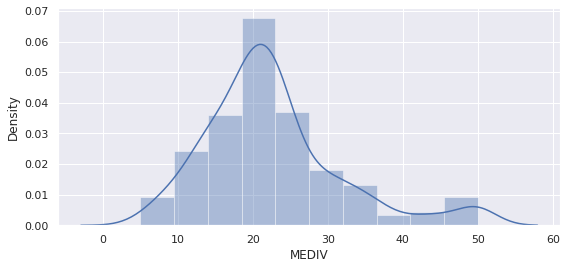

In [41]:
# 목표변수 값의 히스토그램 
sns.set(rc={'figure.figsize':(9, 4)})
sns.distplot(boston_df['MEDIV'], bins=10)
plt.show()

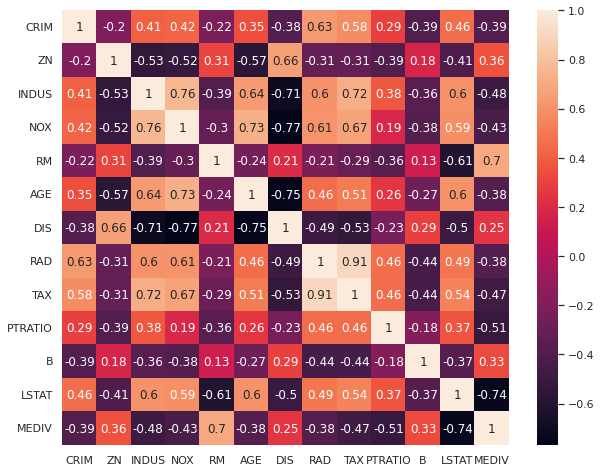

In [10]:
# 각 변수별 상관계수 
correlation_matrix = boston_df.corr().round(2)
# 상관계수의 히트맵 
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [11]:
# 학습용과 데이터 분리(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# 표준화 스케일러 생성 
scalerX = MinMaxScaler()
# 표준화 스케일러를 학습용 데이터에 맞춤
scalerX.fit(X_train)
# 표준화 스케일러로 학습용 데이어를 변환
X_train_norm = scalerX.transform(X_train)
# 표준화 스케일러로 테스트용 데이어를 변환
X_test_norm = scalerX.transform(X_test)

In [15]:
print(X_train_norm)

[[1.57829509e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  8.75737556e-02 5.52907801e-01]
 [5.48854330e-04 1.25000000e-01 2.05645161e-01 ... 6.70212766e-01
  9.98260124e-01 1.80709220e-01]
 [1.88864563e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  1.00000000e+00 8.24964539e-01]
 ...
 [1.56911867e-03 0.00000000e+00 2.96920821e-01 ... 8.82978723e-01
  9.94603863e-01 2.18156028e-01]
 [1.82042493e-02 0.00000000e+00 7.85557185e-01 ... 9.14893617e-01
  1.00000000e+00 9.27092199e-01]
 [9.87225171e-02 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  8.39679258e-03 4.37730496e-01]]


In [16]:
print(X_test_norm)

[[5.33153027e-02 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  1.27590902e-01 4.65248227e-01]
 [4.94115018e-04 0.00000000e+00 1.08137830e-01 ... 5.53191489e-01
  9.97881890e-01 1.12624113e-01]
 [1.18234665e-03 0.00000000e+00 4.92302053e-01 ... 4.04255319e-01
  9.92031873e-01 2.48794326e-01]
 ...
 [2.30455874e-03 2.20000000e-01 1.97947214e-01 ... 6.91489362e-01
  9.49997478e-01 5.27659574e-02]
 [7.06890207e-03 0.00000000e+00 2.81524927e-01 ... 8.93617021e-01
  9.57436078e-01 2.41985816e-01]
 [1.05904270e-03 2.50000000e-01 1.71187683e-01 ... 7.55319149e-01
  1.00000000e+00 2.12482270e-01]]


In [17]:
# 표준화 스케일러 생성 
scalerY = MinMaxScaler()
# 표준화 스케일러를 학습용 데이터에 맞춤
scalerY.fit(y_train)
# 표준화 스케일러로 학습용 데이어를 변환
y_train_norm = scalerY.transform(y_train)
# 표준화 스케일러로 테스트용 데이어를 변환
y_test_norm = scalerY.transform(y_test)

In [18]:
print(y_train_norm[0:10])

[[0.27111111]
 [0.37777778]
 [0.04888889]
 [0.35333333]
 [0.23555556]
 [0.26888889]
 [0.55777778]
 [0.71111111]
 [0.26222222]
 [0.42      ]]


In [19]:
print(y_test_norm[0:10])

[[0.20222222]
 [0.52666667]
 [0.4       ]
 [0.84      ]
 [0.52666667]
 [0.28      ]
 [0.62444444]
 [0.52      ]
 [0.58888889]
 [0.31777778]]


In [20]:
# 모형 구조 
model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(12,)))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

In [21]:
# 모형 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                780       
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,301
Trainable params: 6,301
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 모형 구성 
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

In [ ]:
# 학습 
results = model.fit(X_train_norm, y_train_norm,
                    validation_data=(X_test_norm, y_test_norm),
                    epochs=200, batch_size=32)

In [26]:
# 학습모형에 저장된 키(변수)
print(results.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


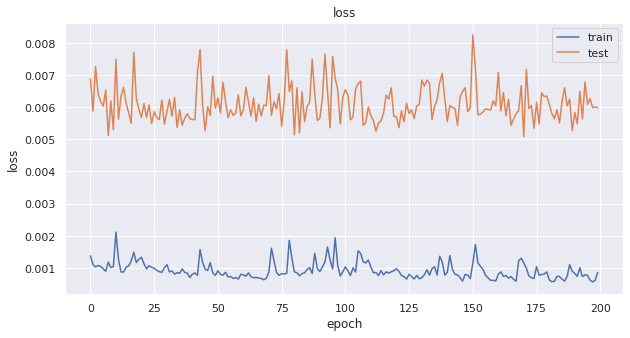

In [27]:
# 학습 수에 따른 loss 변화
plt.figure(figsize=(10, 5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

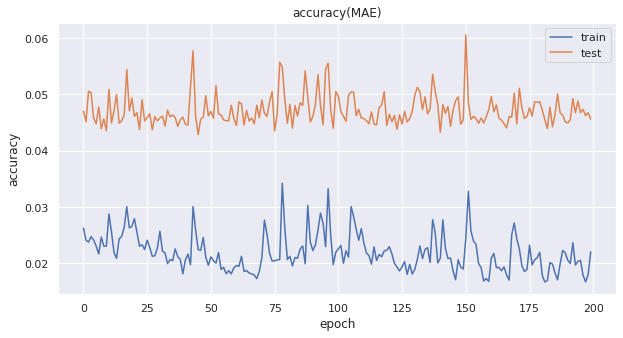

In [28]:
# 학습 수에 따른 정확도(mae) 변화
plt.figure(figsize=(10, 5))
plt.plot(results.history['mae'])
plt.plot(results.history['val_mae'])
plt.title('accuracy(MAE)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [29]:
# 테스트 데이터에 대한 예측 
y_pred = model.predict(X_test_norm).flatten()
# 예측 깂의 역변환
y_pred_inverse = scalerY.inverse_transform(y_pred.reshape(-1,1))
print(y_pred_inverse[0:10])

[[13.62674 ]
 [29.736027]
 [22.207556]
 [32.360447]
 [25.080162]
 [17.23879 ]
 [33.118305]
 [24.356466]
 [32.15182 ]
 [20.455648]]


In [30]:
# 오차 측정(MAE)
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred_inverse))

MAE: 2.05


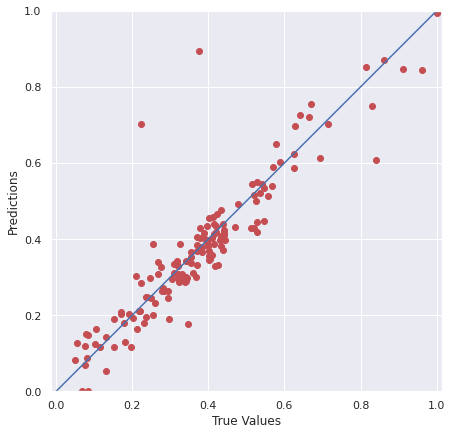

In [31]:
# 실제 값 대비 예측 값의 산포도  
plt.figure(figsize=(7, 7))
plt.scatter(y_test_norm, y_pred, c='r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1])
plt.show()